In [ ]:
import os
import pandas as pd
import numpy as np
from matplotlib import image
import seaborn as sns
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.io import imread
from skimage.color import rgb2gray
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pandas as pd 
import numpy as np 
import cv2
import matplotlib.pyplot as plt
import warnings
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image, image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow import keras
import tensorflow 
import tensorflow as tf



In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pathtest = '/content/drive/MyDrive/Alzheimer_s Dataset-2/test'
pathtrain = '/content/drive/MyDrive/Alzheimer_s Dataset-2/train'

In [ ]:
class1 = '/content/drive/MyDrive/Alzheimer_s Dataset-2/train/VeryMildDemented' 
class2 = '/content/drive/MyDrive/Alzheimer_s Dataset-2/train/MildDemented'
class3 = '/content/drive/MyDrive/Alzheimer_s Dataset-2/train/ModerateDemented'
class0 = '/content/drive/MyDrive/Alzheimer_s Dataset-2/train/NonDemented'


In [ ]:
def file_append(class_path):    
    image_array = []    
    curr_path = os.path.join(os.getcwd(),class_path)  
    cnt = 0
    file_list = [k for k in os.listdir(curr_path) if '.jpg' in k]
    
    for x in file_list:    
        img_path = os.path.join(curr_path,x) 
        img = imread(img_path)
        img = resize(img,(60,60,3))    
        img = img.flatten()
        image_array.append(img)
        
    return image_array
class1_img = file_append(class1)
class2_img = file_append(class2)
class3_img = file_append(class3)
class0_img = file_append(class0)

In [ ]:

df1 = pd.DataFrame(class1_img)
df1['y']  = 1  
df2 = pd.DataFrame(class2_img)
df2['y']  = 2
df3 = pd.DataFrame(class3_img)
df3['y']  = 3
df0 = pd.DataFrame(class0_img)
df0['y']  = 0

df = pd.concat([df0,df1,df2,df3],ignore_index=True)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)


In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,10791,10792,10793,10794,10795,10796,10797,10798,10799,y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
5117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5119,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [ ]:
df.shape

(5121, 10801)

<Axes: >

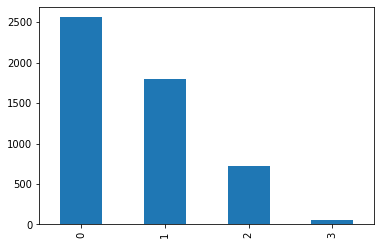

In [ ]:
df['y'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'Class Wise Distribution of data')

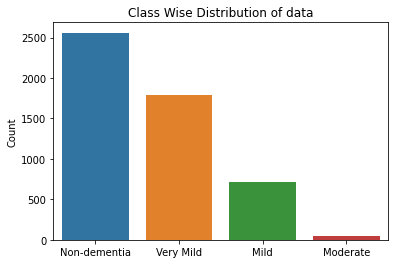

In [ ]:
sns.barplot(x =['Non-dementia','Very Mild', 'Mild', 'Moderate'],y = df['y'].value_counts())
plt.ylabel('Count')
plt.title('Class Wise Distribution of data')

In [ ]:
import tensorflow as tf
from tensorflow import keras
import warnings
from tensorflow.keras import layers

# Load the dataset
train_data = keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/Alzheimer_s Dataset-2/train',
    image_size=(150, 150),
    batch_size=32,
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset='training'
)

Found 5121 files belonging to 4 classes.
Using 4097 files for training.


In [ ]:
test_data = keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/Alzheimer_s Dataset-2/test',
    image_size=(150, 150),
    batch_size=32,
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset='validation'
)

Found 1279 files belonging to 4 classes.
Using 255 files for validation.


In [ ]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)
train_data = train_data.map(lambda x, y: (normalization_layer(x), y))
test_data = test_data.map(lambda x, y: (normalization_layer(x), y))


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [ ]:
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='softmax')
])


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_data, validation_data=test_data, epochs=10)

Epoch 1/10
129/129 [==============================] - 323s 2s/step - loss: 1.0083 - accuracy: 0.5079 - val_loss: 1.3689 - val_accuracy: 0.3804
Epoch 2/10
129/129 [==============================] - 249s 2s/step - loss: 0.8106 - accuracy: 0.6285 - val_loss: 1.3644 - val_accuracy: 0.3804
Epoch 3/10
129/129 [==============================] - 235s 2s/step - loss: 0.5337 - accuracy: 0.7737 - val_loss: 1.3671 - val_accuracy: 0.3804
Epoch 4/10
129/129 [==============================] - 234s 2s/step - loss: 0.3401 - accuracy: 0.8682 - val_loss: 1.3661 - val_accuracy: 0.3804
Epoch 5/10
129/129 [==============================] - 231s 2s/step - loss: 0.1281 - accuracy: 0.9566 - val_loss: 1.3662 - val_accuracy: 0.3804
Epoch 6/10
129/129 [==============================] - 238s 2s/step - loss: 0.0574 - accuracy: 0.9817 - val_loss: 1.3666 - val_accuracy: 0.3804
Epoch 7/10
129/129 [==============================] - 230s 2s/step - loss: 0.0300 - accuracy: 0.9910 - val_loss: 1.3668 - val_accuracy: 0.3804

In [ ]:
test_loss, test_acc = model.evaluate(test_data)
print('Test accuracy:', test_acc)

8/8 [==============================] - 33s 395ms/step - loss: 1.3646 - accuracy: 0.4314
Test accuracy: 0.4313725531101227


In [ ]:
model.save('alzheimer_cnn_model.h5')

In [ ]:
train_loc = "/content/drive/MyDrive/Alzheimer_s Dataset-2/train"
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_loc,
    validation_split = 0.3,
    subset="training",
    image_size=(200, 200),
    batch_size=32,
    seed=42
)

valid_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_loc, 
    validation_split = 0.3,
    subset="validation",
    image_size=(200, 200),
    batch_size=32,
    seed=42
)

Found 5121 files belonging to 4 classes.
Using 3585 files for training.
Found 5121 files belonging to 4 classes.
Using 1536 files for validation.


In [ ]:
classes = ["ND", "VMID", "MID", "MOD"]

train_dataset.class_names = classes
valid_dataset.class_names = classes

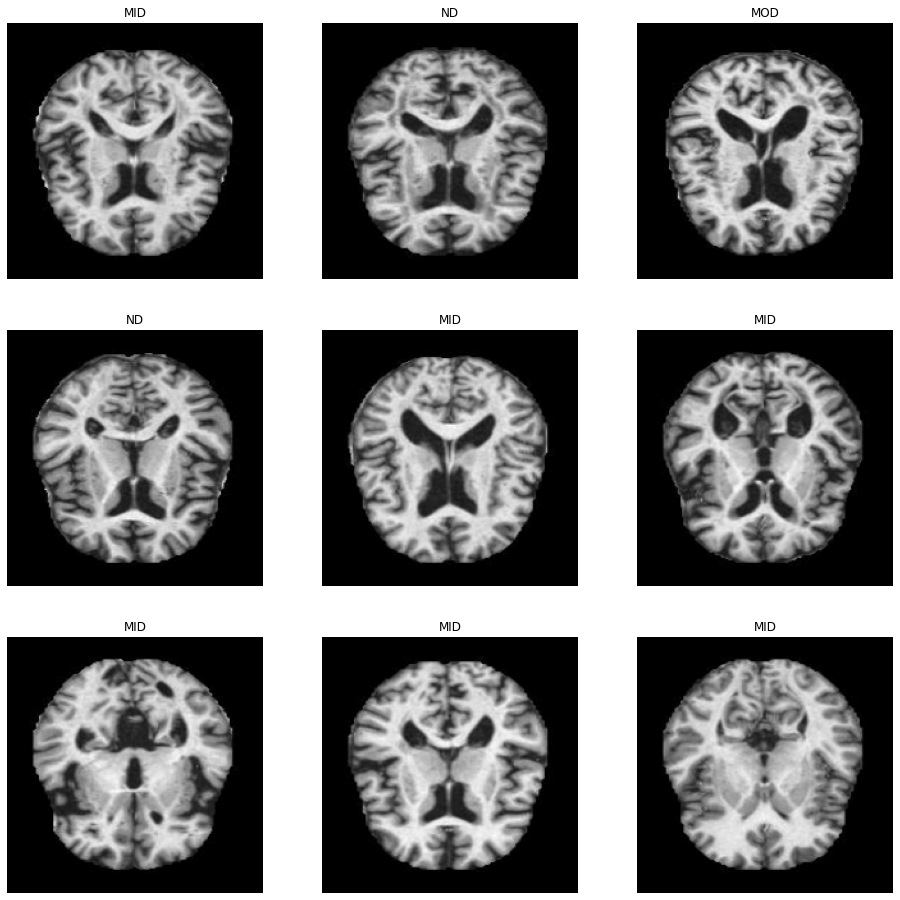

In [ ]:
plt.figure(figsize=(16, 16))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(train_dataset.class_names[labels[i]])
        plt.axis("off")

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_dataset = train_dataset.cache().prefetch(buffer_size=AUTOTUNE)
valid_dataset = valid_dataset.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
moss = tf.keras.Sequential()

moss.add(tf.keras.applications.InceptionResNetV2(weights = 'imagenet', input_shape=(200, 200, 3), include_top=False))

moss.add(tf.keras.layers.Flatten())

moss.add(tf.keras.layers.Dense(128, activation="relu"))

moss.add(tf.keras.layers.Dropout(0.5))

moss.add(tf.keras.layers.Dense(4, activation="softmax"))

In [ ]:
# Using Accuracy as my metric because I want to measure how accurately the model predicts a particular class
# AUC is also good since this is a skewed dataset

moss.compile(optimizer = tf.keras.optimizers.Adam(1e-4), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
# Making certian Layers not trainable
for layer in moss.layers[:-6]:
    layer.trainable = False

In [ ]:
history = moss.fit(train_dataset, validation_data=valid_dataset, epochs=10)

Epoch 1/10
113/113 [==============================] - 2087s 18s/step - loss: 0.9849 - accuracy: 0.5576 - val_loss: 0.9361 - val_accuracy: 0.5482
Epoch 2/10
113/113 [==============================] - 2017s 18s/step - loss: 0.5090 - accuracy: 0.7992 - val_loss: 0.5744 - val_accuracy: 0.7578
Epoch 3/10
113/113 [==============================] - 2006s 18s/step - loss: 0.2243 - accuracy: 0.9202 - val_loss: 0.7176 - val_accuracy: 0.6999
Epoch 4/10
113/113 [==============================] - 2025s 18s/step - loss: 0.1378 - accuracy: 0.9579 - val_loss: 0.7334 - val_accuracy: 0.8242
Epoch 5/10
113/113 [==============================] - 2017s 18s/step - loss: 0.0964 - accuracy: 0.9718 - val_loss: 0.4863 - val_accuracy: 0.8646
Epoch 6/10
113/113 [==============================] - 2022s 18s/step - loss: 0.0785 - accuracy: 0.9749 - val_loss: 0.2380 - val_accuracy: 0.9297
Epoch 7/10
113/113 [==============================] - 2003s 18s/step - loss: 0.0402 - accuracy: 0.9880 - val_loss: 0.3721 - val_ac

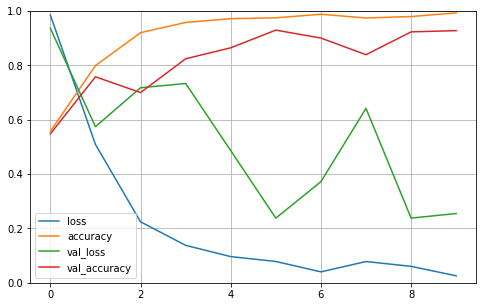

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
test_loc = "/content/drive/MyDrive/Alzheimer_s Dataset-2/test"
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_loc,
    image_size=(200, 200),
    batch_size=32
)

test_dataset = test_dataset.cache().prefetch(buffer_size=AUTOTUNE)

Found 1279 files belonging to 4 classes.


In [ ]:
import torch

def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        "calculate loss for a batch of training data"
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        "calculate loss & accuracy for a batch of validation data"
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))
        
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [ ]:
val = moss.evaluate(test_dataset)
print(val)

40/40 [==============================] - 207s 4s/step - loss: 1.0946 - accuracy: 0.7115
[1.094626784324646, 0.7114933729171753]
